# Part 1 - DSC 550 - Week 7 Exercise

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [3]:
# 1.- Import housing data
df = pd.read_csv('train.csv')

In [4]:
# 2.- Drop Id column
df = df.drop('Id', axis=1)

# Drop columns where 40% or more values are missing
threshold = len(df) * 0.6
df = df.dropna(axis=1, thresh=threshold)

In [5]:
# 3.- Find numerical columns, fill missing values with mean, update data frame
df.update(df.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.mean()), axis=0))

In [6]:
# 4.- Find categorical columns, fill missing values with mode, update data frame
df.update(df.select_dtypes(exclude=['number']).apply(lambda x: x.fillna(x.mode()[0]), axis =0))

In [7]:
# 5.- Transfrom categorical columns in to dummy variables
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=False)

In [8]:
# 6.- Split data into training and test sets. Use 'SalePrice' as the target
X = df.drop(columns='SalePrice')
y = df['SalePrice']
 
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# 7.- Run linear regression
model1 = LinearRegression()

# Fit the model
model1.fit(X_train, y_train)

# Make prediction
model1_pred = model1.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, model1_pred)
r2 = r2_score(y_test, model1_pred)

print(f'The mean squared error is {round(mse,2)}')
print(f'The r2 is {round(r2,2)}')

The mean squared error is 3064859994.2
The r2 is 0.56


In [10]:
# 8.- Create Scaler
scaler = StandardScaler()

# Fit and transform train and test data
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA to retain 90% of variance
pca = PCA(n_components= 0.9, whiten=True)
X_train_pca = pca.fit_transform(X_train_scaled)

In [11]:
# 9.- How many features are in the PCA-transformed matrix?
print(f'Original number of features: {X_train_scaled.shape[1]}')
print(f'Reduced number of features: {X_train_pca.shape[1]}')

Original number of features: 266
Reduced number of features: 136


In [12]:
# 10.- Transform but do not fit test data
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [13]:
# 11.- Run linear regression with transformed data
model2 = LinearRegression()

# Fit the model
model2.fit(X_train_pca, y_train)

# Make prediction
model2_pred = model2.predict(X_test_pca)

# Evaluate model
mse_2 = mean_squared_error(y_test, model2_pred)
r2_2 = r2_score(y_test, model2_pred)

print(f'The mean squared error is {round(mse_2,2)}')
print(f'The r2 is {round(r2_2,2)}')

The mean squared error is 2277009254.1
The r2 is 0.67


In [14]:
# 12.- Create min max scaler
scaler = MinMaxScaler()

# Fit and transform original training data
X_train_mxscaled = scaler.fit_transform(X_train)

In [15]:
# 13.- Create thresholder
thresholder = VarianceThreshold(threshold=0.1)

# Find the min-max features that have variance above 0.1
features_train__high_variance = thresholder.fit_transform(X_train_mxscaled)

In [16]:
# 14.- Transform but do not fit test features
X_test_mxscaled = scaler.transform(X_test)

# Find the min-max features that have variance above 0.1
features_test_high_variance = thresholder.transform(X_test_mxscaled)

In [17]:
# 15.- Run linear regression with transformed data
model3 = LinearRegression()

# Fit the model
model3.fit(features_train__high_variance, y_train)

# Make prediction
model3_pred = model3.predict(features_test_high_variance)

# Evaluate model
mse_3 = mean_squared_error(y_test, model3_pred)
r2_3 = r2_score(y_test, model3_pred)

print(f'The mean squared error is {round(mse_3,2)}')
print(f'The r2 is {round(r2_3,2)}')

The mean squared error is 2711436695.6
The r2 is 0.61


16 .- Summarize your findings. 

The accuracy of the model increased by around 11% when setting scalers and getting rid off columns that were not as significant to determine the target variable. 

# Part 2 - DSC 550 - Week 7 Exercise

In [20]:
# 1.- Import mushrooms data set
mushrooms_df = pd.read_csv('mushrooms.csv')

In [21]:
# 2.- Transfrom categorical columns in to dummy variables
mushrooms_df = pd.get_dummies(mushrooms_df, drop_first=False)

In [22]:
# 3.- Split data into training and test sets. Use 'class_p' as the target
X = mushrooms_df.drop(columns=['class_p','class_e'])
y = mushrooms_df['class_p']
 
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# 4.- Create decision tree classifier
dtc = DecisionTreeClassifier()

# Fit decision tree classifier
dtc.fit(X_train, y_train)

# Make a prediction
y_predict = dtc.predict(X_test)

Accuracy score of decision tree: 1.0


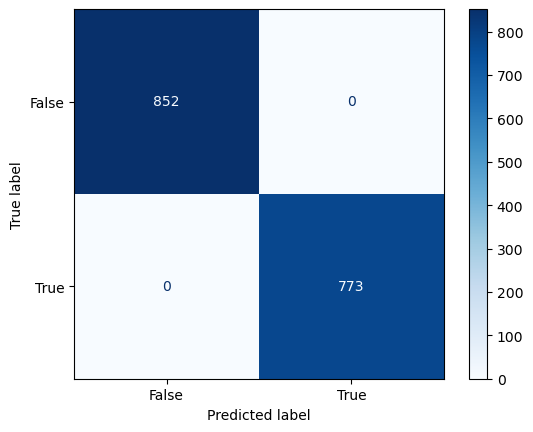

In [24]:
# 5.- Calculate the accuracy of the decision tree
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy score of decision tree: {round(accuracy, 2)}')

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Display confusion matrix
display_conf_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                                             display_labels=dtc.classes_)
display_conf_matrix.plot(cmap='Blues')

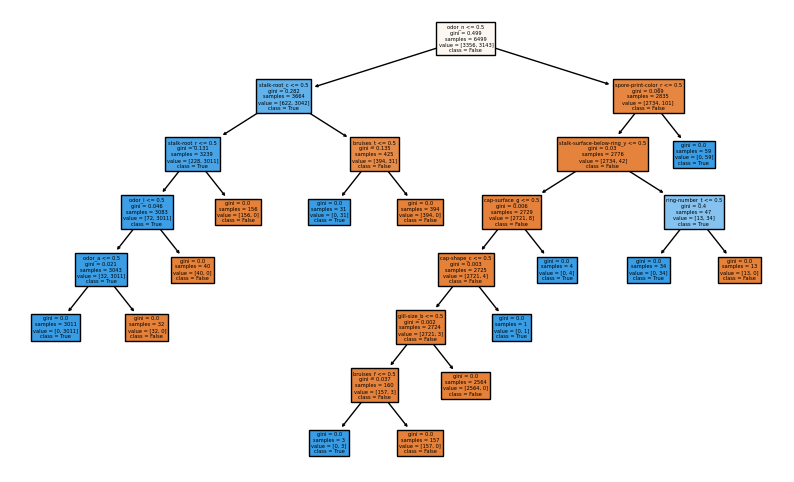

In [25]:
# 6.- Convert class names into strings
class_names = [str(cls) for cls in dtc.classes_]
               
# Create a visualization of the decision tree
plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, class_names=class_names,
          filled=True)
plt.show()

In [26]:
# 7.- Convert categorical data by converting data to integers
features = X.astype(int)
# target = y.astype(int)

# Select 5 features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, y)

In [27]:
# 8.- What 5 features did you choose?
selected_features = chi2_selector.get_support()
top_5_features = X.columns[selected_features]
print(f'The top 5 features are: {top_5_features}')

The top 5 features are: Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')


In [28]:
# 9.- Split data with selected features
X_train, X_test, y_train, y_test = train_test_split(features_kbest,
                                                    y, test_size=0.2, random_state=0)
# Create decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5)

# Fit decision tree classifier
dtc.fit(X_train, y_train)

# Make a prediction
y_predict = dtc.predict(X_test)

# Calculate the accuracy of the decision tree
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy score of decision tree: {round(accuracy, 2)}')

Accuracy score of decision tree: 0.94


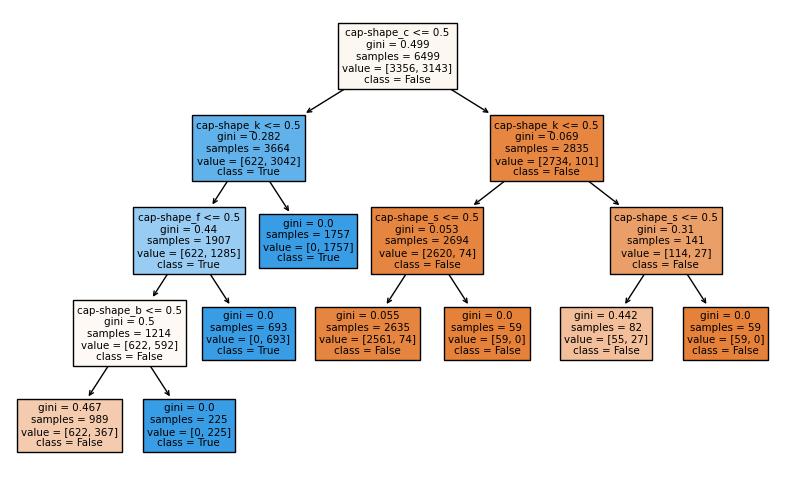

In [29]:
# Convert class names into strings
class_names = [str(cls) for cls in dtc.classes_]
               
# Create a visualization of the decision tree
plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, class_names=class_names,
          filled=True)
plt.show()

10.- Summarize your findings. Despite being a little bit less accurate, I got basically the same results after using the top 5 features. This makes the decision tree more redeable and easy to understand. 